In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import scipy.stats as stats
import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Pfelling-Data.csv',header=0, index_col=0)
del df['OPO4-P [mg/l]']
del df['NH4-N [mg/l]']
df

,Datum,O2 [mg/l],T [°C],LF [µS/cm],pH [--],NO3-N [mg/l],Chlorophyll,Abfluss [m³/s]
0,2016-02-04 22:45:00,13.3,6.3,NaN,8.1,3.6,NaN,881.0
1,2016-02-04 23:00:00,13.3,6.3,NaN,8.1,3.6,NaN,881.0
2,2016-02-04 23:15:00,13.2,6.3,NaN,8.1,3.6,NaN,881.0
3,2016-02-04 23:30:00,13.2,6.2,NaN,8.1,3.6,NaN,881.0
4,2016-02-04 23:45:00,13.2,6.2,NaN,8.1,3.6,NaN,881.0
...,...,...,...,...,...,...,...,...
171937,2020-12-30 23:00:00,11.4,4.6,523.0,8.0,3.1,NaN,288.0
171938,2020-12-30 23:15:00,11.4,4.6,523.0,8.0,3.1,NaN,288.0
171939,2020-12-30 23:30:00,11.4,4.6,523.0,8.0,3.1,NaN,286.0
171940,2020-12-30 23:45:00,11.4,4.6,523.0,8.0,3.1,NaN,286.0


In [3]:
print(df.isna().sum())

Datum                  0
O2 [mg/l]          23830
T [°C]             33764
LF [µS/cm]         65667
pH [--]            26730
NO3-N [mg/l]       33233
Chlorophyll       154814
Abfluss [m³/s]       208
dtype: int64


In [4]:
df = df[df['NO3-N [mg/l]'].notna()]
df

,Datum,O2 [mg/l],T [°C],LF [µS/cm],pH [--],NO3-N [mg/l],Chlorophyll,Abfluss [m³/s]
0,2016-02-04 22:45:00,13.3,6.3,NaN,8.1,3.6,NaN,881.0
1,2016-02-04 23:00:00,13.3,6.3,NaN,8.1,3.6,NaN,881.0
2,2016-02-04 23:15:00,13.2,6.3,NaN,8.1,3.6,NaN,881.0
3,2016-02-04 23:30:00,13.2,6.2,NaN,8.1,3.6,NaN,881.0
4,2016-02-04 23:45:00,13.2,6.2,NaN,8.1,3.6,NaN,881.0
...,...,...,...,...,...,...,...,...
171937,2020-12-30 23:00:00,11.4,4.6,523.0,8.0,3.1,NaN,288.0
171938,2020-12-30 23:15:00,11.4,4.6,523.0,8.0,3.1,NaN,288.0
171939,2020-12-30 23:30:00,11.4,4.6,523.0,8.0,3.1,NaN,286.0
171940,2020-12-30 23:45:00,11.4,4.6,523.0,8.0,3.1,NaN,286.0


In [5]:
df = df.interpolate(method='linear')

In [6]:
df.dropna(inplace=True)
df

,Datum,O2 [mg/l],T [°C],LF [µS/cm],pH [--],NO3-N [mg/l],Chlorophyll,Abfluss [m³/s]
37445,2017-03-01 00:00:00,11.3,6.0,469.050518,8.1,4.2,5.50,419.0
37446,2017-03-01 00:15:00,11.3,5.9,469.051346,8.1,4.2,5.85,419.0
37447,2017-03-01 00:30:00,11.3,6.0,469.052174,8.1,4.2,6.20,419.0
37448,2017-03-01 00:45:00,11.3,5.9,469.053002,8.1,4.2,6.55,419.0
37449,2017-03-01 01:00:00,11.3,5.8,469.053830,8.1,4.2,6.90,417.0
...,...,...,...,...,...,...,...,...
171937,2020-12-30 23:00:00,11.4,4.6,523.000000,8.0,3.1,1.10,288.0
171938,2020-12-30 23:15:00,11.4,4.6,523.000000,8.0,3.1,1.10,288.0
171939,2020-12-30 23:30:00,11.4,4.6,523.000000,8.0,3.1,1.10,286.0
171940,2020-12-30 23:45:00,11.4,4.6,523.000000,8.0,3.1,1.10,286.0


In [7]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [8]:
df['month'] = pd.DatetimeIndex(df['Datum']).month
df = encode(df, 'month', 12)

df['day'] = pd.DatetimeIndex(df['Datum']).day
df = encode(df, 'day', 365)

df['hour'] = pd.DatetimeIndex(df['Datum']).hour
df = encode(df, 'hour', 23)

df

,Datum,O2 [mg/l],T [°C],LF [µS/cm],pH [--],NO3-N [mg/l],Chlorophyll,Abfluss [m³/s],month,month_sin,month_cos,day,day_sin,day_cos,hour,hour_sin,hour_cos
37445,2017-03-01 00:00:00,11.3,6.0,469.050518,8.1,4.2,5.50,419.0,3,1.000000e+00,6.123234e-17,1,0.017213,0.999852,0,0.000000e+00,1.000000
37446,2017-03-01 00:15:00,11.3,5.9,469.051346,8.1,4.2,5.85,419.0,3,1.000000e+00,6.123234e-17,1,0.017213,0.999852,0,0.000000e+00,1.000000
37447,2017-03-01 00:30:00,11.3,6.0,469.052174,8.1,4.2,6.20,419.0,3,1.000000e+00,6.123234e-17,1,0.017213,0.999852,0,0.000000e+00,1.000000
37448,2017-03-01 00:45:00,11.3,5.9,469.053002,8.1,4.2,6.55,419.0,3,1.000000e+00,6.123234e-17,1,0.017213,0.999852,0,0.000000e+00,1.000000
37449,2017-03-01 01:00:00,11.3,5.8,469.053830,8.1,4.2,6.90,417.0,3,1.000000e+00,6.123234e-17,1,0.017213,0.999852,1,2.697968e-01,0.962917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171937,2020-12-30 23:00:00,11.4,4.6,523.000000,8.0,3.1,1.10,288.0,12,-2.449294e-16,1.000000e+00,30,0.493776,0.869589,23,-2.449294e-16,1.000000
171938,2020-12-30 23:15:00,11.4,4.6,523.000000,8.0,3.1,1.10,288.0,12,-2.449294e-16,1.000000e+00,30,0.493776,0.869589,23,-2.449294e-16,1.000000
171939,2020-12-30 23:30:00,11.4,4.6,523.000000,8.0,3.1,1.10,286.0,12,-2.449294e-16,1.000000e+00,30,0.493776,0.869589,23,-2.449294e-16,1.000000
171940,2020-12-30 23:45:00,11.4,4.6,523.000000,8.0,3.1,1.10,286.0,12,-2.449294e-16,1.000000e+00,30,0.493776,0.869589,23,-2.449294e-16,1.000000


<Figure size 864x864 with 0 Axes>

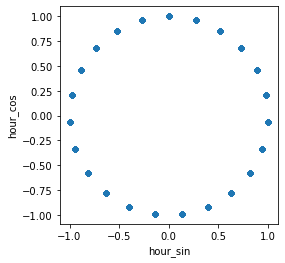

In [9]:
from matplotlib.pyplot import figure
figure(figsize=(12, 12))
ax = df.plot.scatter('hour_sin', 'hour_cos').set_aspect('equal')

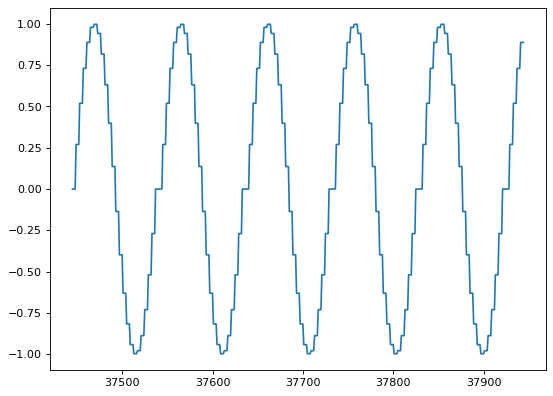

In [20]:
time = df.iloc[:500]

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
ax = time['hour_sin'].plot()

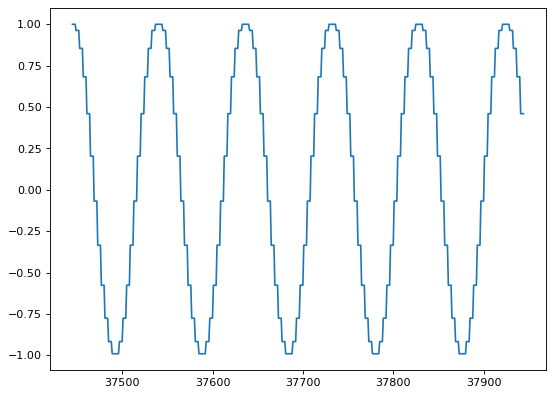

In [21]:
figure(figsize=(8, 6), dpi=80)
ax = time['hour_cos'].plot()

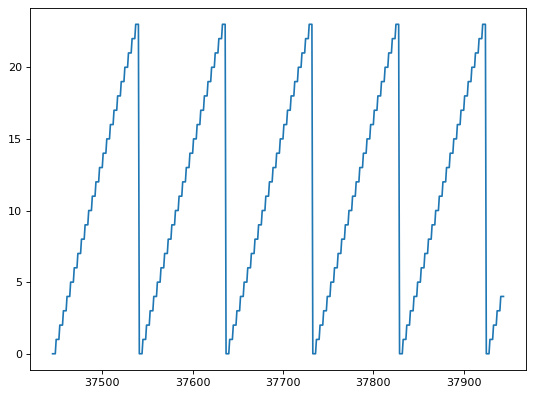

In [22]:
figure(figsize=(8, 6), dpi=80)
ax = time['hour'].plot()

In [29]:
writer = pd.ExcelWriter('time.xlsx')
time.to_excel(writer)
writer.save()

In [9]:
columns = ['Chlorophyll','Abfluss [m³/s]']
df[columns] = df[columns].apply(np.log)

In [10]:
# train-test 80-20 split
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, 
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 100)

NO3-N [mg/l]      1.000000
mnth_cos          0.748772
O2 [mg/l]         0.607595
Abfluss [m³/s]    0.444812
Chlorophyll       0.337841
mnth_sin          0.274171
LF [µS/cm]        0.260730
pH [--]           0.204022
d_sin             0.017151
d_cos             0.007971
hr_cos            0.006049
hr_sin            0.001484
minute_cos        0.000605
minute           -0.000379
minute_sin       -0.002593
hr               -0.005837
d                -0.035954
mth              -0.316111
T [°C]           -0.721136
Name: NO3-N [mg/l], dtype: float64

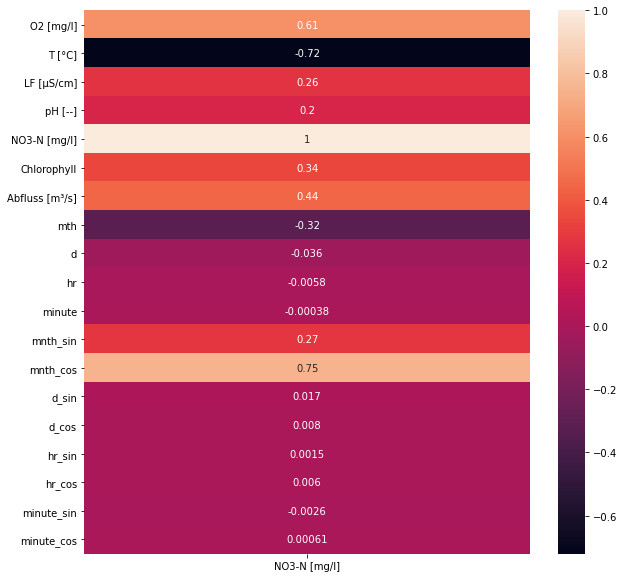

In [11]:
X_NAMES1 = ['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','NH4-N [mg/l]','OPO4-P [mg/l]','Chlorophyll','Abfluss [m³/s]']
Y_NAMES1 = ['NO3-N [mg/l]']

corr = df_train.corr()
corr = corr.loc[:, Y_NAMES1]
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True)
corr['NO3-N [mg/l]'].sort_values(ascending=False)

In [18]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]','month_sin','month_cos','day_sin','day_cos','hour_sin','hour_cos']]
y_train = df_train[['NO3-N [mg/l]']]

X_test = df_test[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]','month_sin','month_cos','day_sin','day_cos','hour_sin','hour_cos']]
y_test = df_test[['NO3-N [mg/l]']]

In [13]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r2 = scores['test_r2'].mean()
rmse = np.sqrt(abs(score))
print(rmse, r2)

0.41133238197986244 0.6963975793805469


In [14]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, max_depth = 10)
scores = cross_validate(rf, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r2 = scores['test_r2'].mean()
rmse = np.sqrt(abs(score))
print(rmse, r2)

0.09712291324715823 0.9830691320660498


In [15]:
from sklearn.feature_selection import RFECV
forest = RandomForestRegressor(n_jobs=-1, max_depth = 10)
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=forest,
    step=1,
    cv=5,
    scoring='neg_mean_squared_error',
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, y_train)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 6


In [15]:
rfecv.estimator_.feature_importances_ 

array([0.49955826, 0.13662342, 0.06645179, 0.16682941, 0.09358309,
       0.03695402])

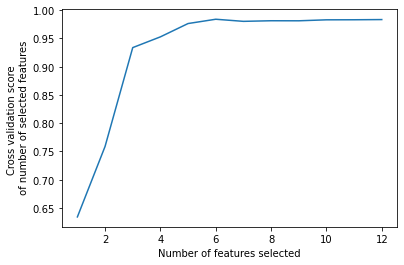

In [16]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score \n of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [17]:
rfecv.grid_scores_

array([0.63385736, 0.75869931, 0.93374301, 0.95280147, 0.97639065,
       0.98399404, 0.98026239, 0.9813335 , 0.98124445, 0.98296271,
       0.98307969, 0.98341421])

In [16]:
features = [f for f,s in zip(X_train.columns, rfecv.support_) if s]
features

['T [°C]', 'LF [µS/cm]', 'Chlorophyll', 'month_sin', 'month_cos', 'day_sin']

In [11]:
X_train = df_train[['O2 [mg/l]', 'T [°C]', 'LF [µS/cm]', 'Chlorophyll', 'month_sin', 'month_cos']]
y_train = df_train[['NO3-N [mg/l]']]

X_test = df_test[['O2 [mg/l]', 'T [°C]', 'LF [µS/cm]', 'Chlorophyll', 'month_sin', 'month_cos']]
y_test = df_test[['NO3-N [mg/l]']]

In [23]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, max_depth = 10)
scores = cross_validate(rf, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r2 = scores['test_r2'].mean()
rmse = np.sqrt(abs(score))
print(rmse, r2)

0.09457300819690742 0.9839520956334837


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

def fit_linear_reg(X,y):
    #Fit linear regression model and return RSS and R squared values
    LR = LinearRegression()
    LR.fit(X,y)
    score = mean_squared_error(y,LR.predict(X))
    R_squared = LR.score(X,y)

    #scores = cross_validate(LR, X, y, scoring=('r2', 'neg_mean_squared_error'), cv=5,n_jobs=-1)
    #score = scores['test_neg_mean_squared_error'].mean()
    #R_squared = scores['test_r2'].mean()
    return score, R_squared

In [14]:
import itertools
remaining_features = list(X_train.columns.values)
features = []
score_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()
k=14

for i in range(1,k+1):
    best_score = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            score = fit_linear_reg(X_train[list(combo) + features],y_train)   #Store temp result 

            if score[0] < best_score:
                best_score = score[0]
                best_R_squared = score[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    score_list.append(best_score)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [15]:
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'MSE':score_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [16]:
#Initializing useful variables
m = len(y_train)

#Computing
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1['RMSE'] = np.sqrt(abs(df1['MSE']))
df1

,features,MSE,R_squared,numb_features,R_squared_adj,RMSE
1,[mnth_cos],0.244838,0.560660,1,0.560655,0.494811
2,"[mnth_cos, mnth_sin]",0.193391,0.652977,2,0.652969,0.439763
3,"[mnth_cos, mnth_sin, Abfluss [m³/s]]",0.186264,0.665767,3,0.665755,0.431583
4,"[mnth_cos, mnth_sin, Abfluss [m³/s], LF [µS/cm]]",0.181382,0.674527,4,0.674512,0.425889
5,"[mnth_cos, mnth_sin, Abfluss [m³/s], LF [µS/cm...",0.176862,0.682637,5,0.682618,0.420550
6,"[mnth_cos, mnth_sin, Abfluss [m³/s], LF [µS/cm...",0.171454,0.692341,6,0.692319,0.414070
7,"[mnth_cos, mnth_sin, Abfluss [m³/s], LF [µS/cm...",0.171111,0.692957,7,0.692933,0.413655
8,"[mnth_cos, mnth_sin, Abfluss [m³/s], LF [µS/cm...",0.171015,0.693129,8,0.693101,0.413539
9,"[mnth_cos, mnth_sin, Abfluss [m³/s], LF [µS/cm...",0.170971,0.693208,9,0.693176,0.413486
10,"[mnth_cos, mnth_sin, Abfluss [m³/s], LF [µS/cm...",0.170927,0.693286,10,0.693251,0.413434


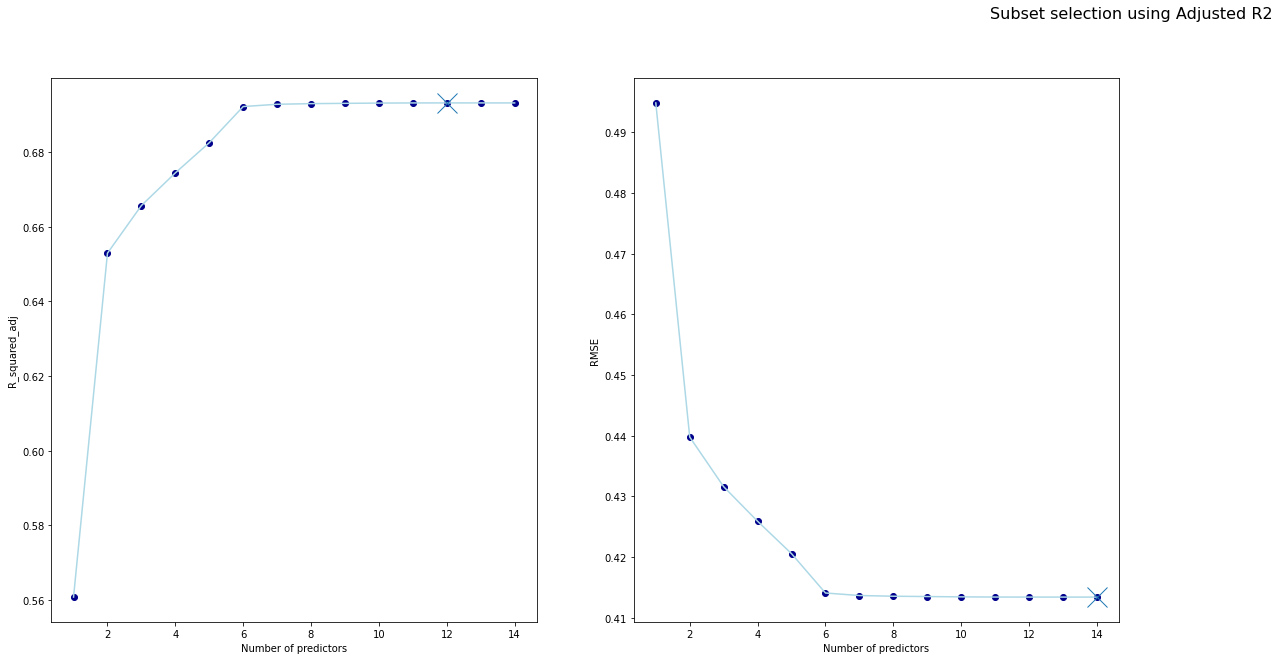

In [17]:
variables = ['R_squared_adj','RMSE']
fig = plt.figure(figsize = (40,10))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using Adjusted R2', fontsize = 16)
plt.show()

In [18]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'MSE')
display([(i,features_list[i], round(score_list[i])) for i in range(1,14)])

Forward stepwise subset selection
Number of features | Features | MSE


[(1, ['mnth_cos'], 0),
 (2, ['mnth_cos', 'mnth_sin'], 0),
 (3, ['mnth_cos', 'mnth_sin', 'Abfluss [m³/s]'], 0),
 (4, ['mnth_cos', 'mnth_sin', 'Abfluss [m³/s]', 'LF [µS/cm]'], 0),
 (5,
  ['mnth_cos', 'mnth_sin', 'Abfluss [m³/s]', 'LF [µS/cm]', 'Chlorophyll'],
  0),
 (6,
  ['mnth_cos',
   'mnth_sin',
   'Abfluss [m³/s]',
   'LF [µS/cm]',
   'Chlorophyll',
   'O2 [mg/l]'],
  0),
 (7,
  ['mnth_cos',
   'mnth_sin',
   'Abfluss [m³/s]',
   'LF [µS/cm]',
   'Chlorophyll',
   'O2 [mg/l]',
   'pH [--]'],
  0),
 (8,
  ['mnth_cos',
   'mnth_sin',
   'Abfluss [m³/s]',
   'LF [µS/cm]',
   'Chlorophyll',
   'O2 [mg/l]',
   'pH [--]',
   'hr_sin'],
  0),
 (9,
  ['mnth_cos',
   'mnth_sin',
   'Abfluss [m³/s]',
   'LF [µS/cm]',
   'Chlorophyll',
   'O2 [mg/l]',
   'pH [--]',
   'hr_sin',
   'hr_cos'],
  0),
 (10,
  ['mnth_cos',
   'mnth_sin',
   'Abfluss [m³/s]',
   'LF [µS/cm]',
   'Chlorophyll',
   'O2 [mg/l]',
   'pH [--]',
   'hr_sin',
   'hr_cos',
   'T [°C]'],
  0),
 (11,
  ['mnth_cos',
   'mnth_s

In [19]:
X_train = df_train[['mnth_cos',
   'mnth_sin',
   'Abfluss [m³/s]',
   'LF [µS/cm]',
   'Chlorophyll',
   'O2 [mg/l]',
   'pH [--]',
   'hr_sin',
   'hr_cos',
   'T [°C]',
   'd_cos',
   'd_sin']]
y_train = df_train[['NO3-N [mg/l]']]

X_test = df_test[['mnth_cos',
   'mnth_sin',
   'Abfluss [m³/s]',
   'LF [µS/cm]',
   'Chlorophyll',
   'O2 [mg/l]',
   'pH [--]',
   'hr_sin',
   'hr_cos',
   'T [°C]',
   'd_cos',
   'd_sin']]
y_test = df_test[['NO3-N [mg/l]']]

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
LR = LinearRegression()
best_LR = LR.fit(X_train, y_train)
y_LR = best_LR.predict(X_test)
r2_lr = r2_score(y_test,y_LR)
RMSE = np.sqrt(mean_squared_error(y_test,y_LR))
print(RMSE, r2_lr)

0.40910780979827316 0.6998093757141399


In [15]:
X_train = df_train[['mnth_cos']]
y_train = df_train[['NO3-N [mg/l]']]
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r21 = scores['test_r2'].mean()
rmse1 = np.sqrt(abs(score))
print(rmse1, r21)

0.4948267122291197 0.5606333896490996


In [16]:
X_train = df_train[['T [°C]']]
y_train = df_train[['NO3-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r22 = scores['test_r2'].mean()
rmse2 = np.sqrt(abs(score))
print(rmse2, r22)

0.5172040931559885 0.5199759300805975


In [17]:
X_train = df_train[['O2 [mg/l]','T [°C]']]
y_train = df_train[['NO3-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r23 = scores['test_r2'].mean()
rmse3 = np.sqrt(abs(score))
print(rmse3, r23)

0.5137822502612779 0.5263199689465974


In [18]:
X_train = df_train[['O2 [mg/l]','T [°C]','Abfluss [m³/s]']]
y_train = df_train[['NO3-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r24 = scores['test_r2'].mean()
rmse4 = np.sqrt(abs(score))
print(rmse4, r24)

0.4916373388294615 0.5662695939731985


In [19]:
X_train = df_train[['O2 [mg/l]','T [°C]','Chlorophyll','Abfluss [m³/s]']]
y_train = df_train[['NO3-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r25 = scores['test_r2'].mean()
rmse5 = np.sqrt(abs(score))
print(rmse5, r25)

0.48405998481373047 0.5795287379810511


In [70]:
X_train = df_train[['O2 [mg/l]','T [°C]','Chlorophyll','Abfluss [m³/s]','mnth_sin','mnth_cos']]
y_train = df_train[['NO3-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r26 = scores['test_r2'].mean()
rmse6 = np.sqrt(abs(score))
print(rmse6, r26)

0.42175006397256604 0.6808219239508048


In [20]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','Chlorophyll','Abfluss [m³/s]']]
y_train = df_train[['NO3-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r27 = scores['test_r2'].mean()
rmse7 = np.sqrt(abs(score))
print(rmse7, r27)

0.46204145911590255 0.6169201801517408


In [21]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]']]
y_train = df_train[['NO3-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r28 = scores['test_r2'].mean()
rmse8 = np.sqrt(abs(score))
print(rmse8, r28)

0.4618392246950025 0.6172552127130302


In [73]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]','mnth_sin','mnth_cos','d_sin']]
y_train = df_train[['NO3-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r29 = scores['test_r2'].mean()
rmse9 = np.sqrt(abs(score))
print(rmse9, r29)

0.4136960272478102 0.6928979893362257


In [74]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]','mnth_sin','mnth_cos','d_sin','d_cos']]
y_train = df_train[['NO3-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r210 = scores['test_r2'].mean()
rmse10 = np.sqrt(abs(score))
print(rmse10, r210)

0.41367063284362693 0.6929358331974457


In [75]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]','mnth_sin','mnth_cos','d_sin','d_cos','hr_cos']]
y_train = df_train[['NO3-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r211 = scores['test_r2'].mean()
rmse11 = np.sqrt(abs(score))
print(rmse11, r211)

0.4136241274885133 0.6930049738568932


In [76]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]','mnth_sin','mnth_cos','d_sin','d_cos','hr_cos','hr_sin']]
y_train = df_train[['NO3-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r212 = scores['test_r2'].mean()
rmse12 = np.sqrt(abs(score))
print(rmse12, r212)

0.41349057054794713 0.6932025715907607


In [77]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]','mnth_sin','mnth_cos','d_sin','d_cos','hr_cos','hr_sin','minute_sin']]
y_train = df_train[['NO3-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r213 = scores['test_r2'].mean()
rmse13 = np.sqrt(abs(score))
print(rmse13, r213)

0.4135050172188605 0.6931809476452004


In [78]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]','mnth_sin','mnth_cos','d_sin','d_cos','hr_cos','hr_sin','minute_sin','minute_cos']]
y_train = df_train[['NO3-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r214 = scores['test_r2'].mean()
rmse14 = np.sqrt(abs(score))
print(rmse14, r214)

0.41351453426847873 0.6931668173772824


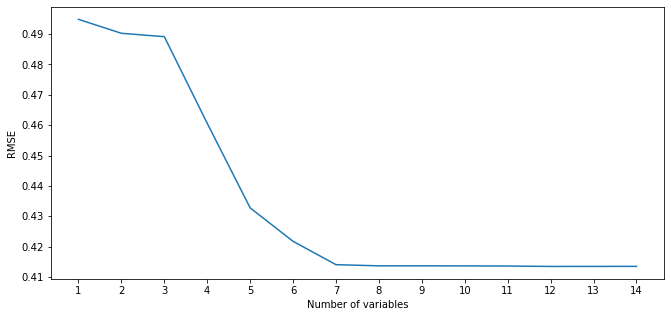

In [88]:
plt.figure(figsize=(11,5))
plt.xticks(range(1,15))
plt.xlabel('Number of variables')
plt.ylabel('RMSE')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14],[rmse1, rmse2, rmse3, rmse4, rmse5, rmse6, rmse7, rmse8,rmse9,rmse10,rmse11,rmse12,rmse13,rmse14])

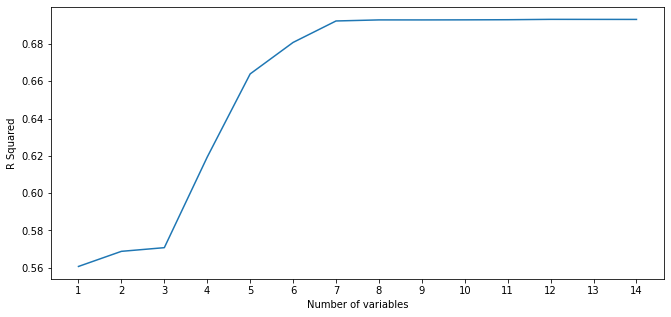

In [89]:
plt.figure(figsize=(11,5))
plt.xticks(range(1,15))
plt.xlabel('Number of variables')
plt.ylabel('R Squared')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14],[r21,r22,r23,r24,r25,r26,r27,r28,r29,r210,r211,r212,r213,r214])

In [85]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]','mnth_sin','mnth_cos','d_sin','d_cos','hr_cos','hr_sin']]
y_train = df_train[['NO3-N [mg/l]']]

X_test = df_test[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]','mnth_sin','mnth_cos','d_sin','d_cos','hr_cos','hr_sin']]
y_test = df_test[['NO3-N [mg/l]']]

from sklearn.metrics import r2_score

linear = LinearRegression()
best_LR = linear.fit(X_train,y_train)
y_LR = best_LR.predict(X_test)
RMSE_LR = np.sqrt(mean_squared_error(y_test,y_LR))
r2 = r2_score(y_test,y_LR)
print(RMSE_LR,r2)

0.4111956234528229 0.6967376117131157


In [90]:
X = df[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]','mnth_sin','mnth_cos','d_sin','d_cos','hr_sin','hr_cos','minute_sin','minute_cos']]
y = df[['NO3-N [mg/l]']]

In [91]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_jobs=-1, max_depth = 10)
forest.fit(X, y)

from sklearn.feature_selection import RFE

# define RFE
rfe = RFE(forest, n_features_to_select=6)

# fit RFE
rfe.fit(X, y)

# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 3.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 2.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 5.000
Column: 9, Selected False, Rank: 4.000
Column: 10, Selected False, Rank: 6.000
Column: 11, Selected False, Rank: 7.000
Column: 12, Selected False, Rank: 9.000
Column: 13, Selected False, Rank: 8.000


In [11]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, max_depth = 10)

In [13]:
X_train = df_train[['T [°C]']]
y_train = df_train[['NO3-N [mg/l]']]
from sklearn.model_selection import cross_validate
scores = cross_validate(rf, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r2 = scores['test_r2'].mean()
rmse = np.sqrt(abs(score))
print(rmse, r2)

0.4515703768531479 0.634087018384159


In [14]:
X_train = df_train[['O2 [mg/l]','T [°C]']]
y_train = df_train[['NO3-N [mg/l]']]
from sklearn.model_selection import cross_val_score
scores = cross_validate(rf, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r2 = scores['test_r2'].mean()
rmse = np.sqrt(abs(score))
print(rmse, r2)

0.35062176764091424 0.7794145720789889


In [15]:
X_train = df_train[['O2 [mg/l]','T [°C]','Abfluss [m³/s]']]
y_train = df_train[['NO3-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(rf, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r2 = scores['test_r2'].mean()
rmse = np.sqrt(abs(score))
print(rmse, r2)

0.22174211377876238 0.9117684056661727


In [16]:
X_train = df_train[['O2 [mg/l]','T [°C]','Chlorophyll','Abfluss [m³/s]']]
y_train = df_train[['NO3-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(rf, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r2 = scores['test_r2'].mean()
rmse = np.sqrt(abs(score))
print(rmse, r2)

0.1591345036816952 0.9545633425649808


In [17]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','Chlorophyll','Abfluss [m³/s]']]
y_train = df_train[['NO3-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(rf, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r2 = scores['test_r2'].mean()
rmse = np.sqrt(abs(score))
print(rmse, r2)

0.13774445019900525 0.9659468147784164


In [18]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]']]
y_train = df_train[['NO3-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(rf, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r2 = scores['test_r2'].mean()
rmse = np.sqrt(abs(score))
print(rmse, r2)

0.12196308759790252 0.9732944527541033


In [12]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid  
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [6, 12, 20],
    'min_samples_split': [6, 12, 20]
}

In [13]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_jobs=-1, max_depth = 10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = forest, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(X_train, y_train.values.ravel())
grid_search.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 31.2min finished


{'bootstrap': True,
 'max_depth': 30,
 'min_samples_leaf': 6,
 'min_samples_split': 12}

In [14]:
best_grid = grid_search.best_estimator_

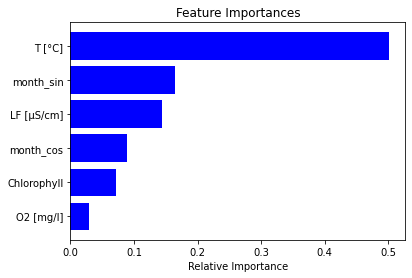

In [15]:
features=X_train.columns[[0,1,2,3,4,5]]
importances = best_grid.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [17]:
y_rf = best_grid.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
RMSE_rf=np.sqrt(mean_squared_error(y_test,y_rf))
r2_rf = r2_score(y_test,y_rf)
print(RMSE_rf,r2_rf)

0.042860583235832986 0.9967051341529718


In [28]:
y_test = y_test.to_numpy()
sub_df = pd.DataFrame({'Observed':y_test.ravel(),'MLR Predicted':y_LR.ravel(), 'RF Predicted':y_rf.ravel()})
sub_df

,Observed,MLR Predicted,RF Predicted
0,2.4,2.705187,2.383860
1,1.9,1.674305,1.878585
2,2.6,2.389225,2.564781
3,1.6,2.172092,1.600000
4,1.6,1.963215,1.564786
...,...,...,...
21851,2.0,1.735991,2.000000
21852,2.1,1.631524,2.085978
21853,1.4,1.850816,1.443621
21854,2.7,3.059132,2.713871


In [23]:
writer = pd.ExcelWriter('NO3-Pfelling.xlsx')
sub_df.to_excel(writer)
writer.save()

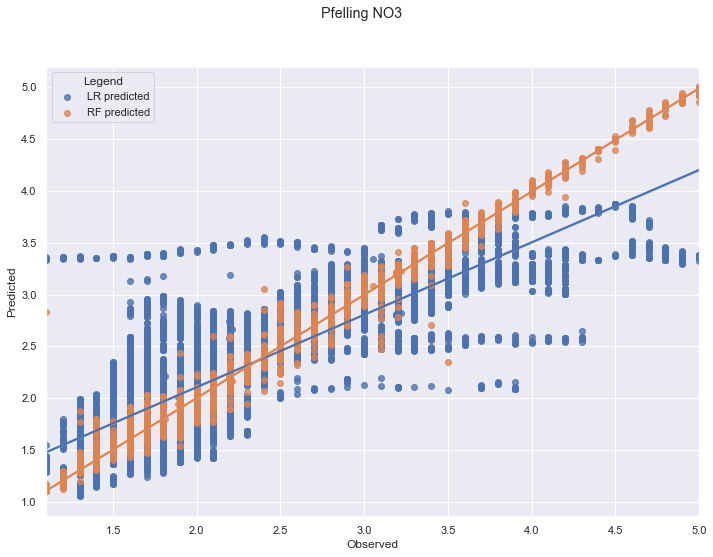

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(x=y_test, y=y_LR, data=sub_df, label='LR predicted')
sns.regplot(x=y_test, y=y_rf, data=sub_df, label='RF predicted')
plt.suptitle('Pfelling NO3')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.legend(title='Legend', loc='upper left')

Text(0.5, 0.98, 'Pfelling NO3')

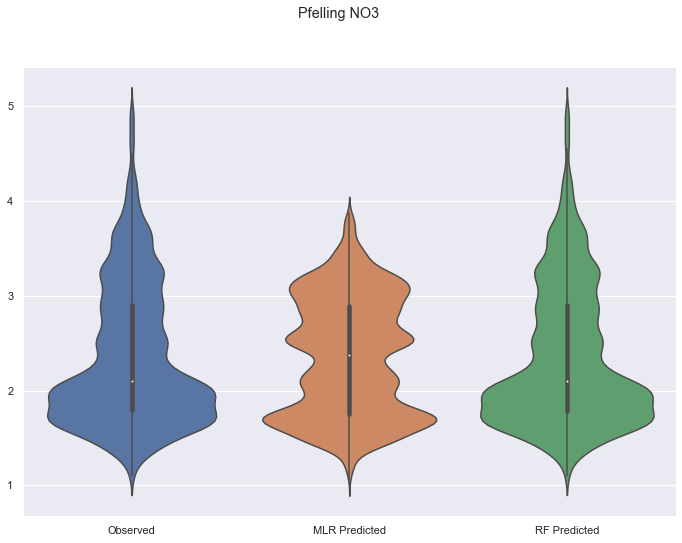

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=sub_df)
plt.suptitle('Pfelling NO3')

In [26]:
NRMSE_LR = RMSE/(sub_df['LR Predicted'].mean())
NRMSE_rf = RMSE_rf/(sub_df['RF Predicted'].mean())
print(NRMSE_LR,NRMSE_rf)

0.17359380368272292 0.01817217716120333
